Прочтём данные из файлов с результатами A/B-тестирования:

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('datasets/orders.csv', parse_dates=['date'])

In [3]:
visitors = pd.read_csv('datasets/visitors.csv', parse_dates=['date'])

In [4]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [6]:
def cumulate_column(df, column):
    grouped_by_a = df[df['group'] == 'A'][column].cumsum()
    grouped_by_b = df[df['group'] == 'B'][column].cumsum()
    cumulated = pd.concat([grouped_by_a, grouped_by_b]).reset_index()
    cumulated.sort_values(by='index', inplace=True)
    return cumulated.set_index('index')

In [7]:
visitors_aggregated = visitors.groupby(['date','group'], as_index=False).agg({'date' : 'max',
                                                                              'group' : 'max',
                                                                              'visitors' : 'sum'}, axis=1)

In [8]:
orders_aggregated = orders.groupby(['date','group'], as_index=False).agg({'date' : 'max',
                                                                          'group' : 'max',
                                                                          'transactionId' : 'nunique',
                                                                          'visitorId' : 'nunique',
                                                                          'revenue' : 'sum'}, axis=1)

In [9]:
visitors_aggregated

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507
...,...,...,...
57,2019-08-29,B,531
58,2019-08-30,A,490
59,2019-08-30,B,490
60,2019-08-31,A,699


In [10]:
orders_aggregated

,date,group,transactionId,visitorId,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,20,19,93822
3,2019-08-02,B,24,23,165531
4,2019-08-03,A,24,24,112473
...,...,...,...,...,...
57,2019-08-29,B,20,20,231130
58,2019-08-30,A,11,10,86460
59,2019-08-30,B,24,24,215233
60,2019-08-31,A,12,12,61833


In [11]:
cumulate_column(visitors_aggregated, 'visitors')

,visitors
index,
0,719
1,713
2,1338
3,1294
4,1845
...,...
57,17708
58,18037
59,18198


In [12]:
cumulate_column(orders_aggregated, 'revenue')

,revenue
index,
0,148579
1,101217
2,242401
3,266748
4,354874
...,...
57,5559398
58,4022970
59,5774631


In [13]:
visitors_aggregated['visitors'] = cumulate_column(visitors_aggregated, 'visitors')
orders_aggregated['transactionId'] = cumulate_column(orders_aggregated, 'transactionId')
orders_aggregated['visitorId'] = cumulate_column(orders_aggregated, 'visitorId')

In [14]:
visitors_aggregated

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845
...,...,...,...
57,2019-08-29,B,17708
58,2019-08-30,A,18037
59,2019-08-30,B,18198
60,2019-08-31,A,18736


In [15]:
orders_aggregated

,date,group,transactionId,visitorId,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,44,39,93822
3,2019-08-02,B,45,43,165531
4,2019-08-03,A,68,63,112473
...,...,...,...,...,...
57,2019-08-29,B,596,584,231130
58,2019-08-30,A,545,531,86460
59,2019-08-30,B,620,608,215233
60,2019-08-31,A,557,543,61833


In [16]:
cumulativeData = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(11)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,39,93822,1338
3,2019-08-02,B,45,43,165531,1294
4,2019-08-03,A,68,63,112473,1845
5,2019-08-03,B,61,59,114248,1803
6,2019-08-04,A,84,78,70825,2562
7,2019-08-04,B,78,75,108571,2573
8,2019-08-05,A,109,103,124218,3318
9,2019-08-05,B,101,98,92428,3280


In [17]:
cumulativeData = orders_aggregated.merge(visitors_aggregated)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,39,93822,1338
3,2019-08-02,B,45,43,165531,1294
4,2019-08-03,A,68,63,112473,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,584,231130,17708
58,2019-08-30,A,545,531,86460,18037
59,2019-08-30,B,620,608,215233,18198
60,2019-08-31,A,557,543,61833,18736


In [18]:
visitors[visitors['date'] == '2019-08-05']

,date,group,visitors
4,2019-08-05,A,756
35,2019-08-05,B,707


In [19]:
orders[orders['date'] == '2019-08-05'].count()

transactionId    48
visitorId        48
date             48
revenue          48
group            48
dtype: int64

In [20]:
temp = orders[orders['date'] == '2019-08-05']

In [21]:
temp.groupby(['date'], as_index=False).agg({'date' : 'max',
                                            'group' : 'max',
                                            'transactionId' : 'nunique',
                                            'visitorId' : 'nunique',
                                            'revenue' : 'sum'}, axis=1)

,date,group,transactionId,visitorId,revenue
0,2019-08-05,B,48,47,216646


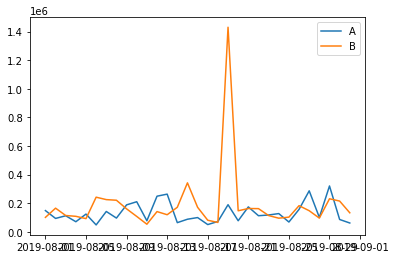

In [22]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

In [23]:
from solver.ab_reporter import ABReporter

In [24]:
example = ABReporter('datasets/visitors.csv', 'datasets/orders.csv')

In [25]:
example.grouped_summary()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,39,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,63,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,584,5559398,17708
58,2019-08-30,A,545,531,4022970,18037
59,2019-08-30,B,620,608,5774631,18198
60,2019-08-31,A,557,543,4084803,18736


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:


In [ ]:
df = visitors.groupby(['date','group'], as_index=False).agg({'date' : 'max',
                                                        'group' : 'max',
                                                        'visitors' : 'sum'}, axis=1).sort_values(by=['date','group'])

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))